In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from operator import attrgetter


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



Sebuah perusahaan yang menjual peralatan sepeda bernama BikeStore ingin melakukan analisis
berdasarkan data yang mereka punya di tahun sebelumnya, yaitu tahun 2017.
Anda bekerja sebagai data scientist di perusahaan ini. Anda mendapatkan satu dataset berisikan daftar
transaksi selama tahun 2017 dan diminta untuk melakukan beberapa analisis..
1. Sebelum melakukan analisis, tampilkan dataset store_bike.csv! Di dalamnya ada kolom
'transaction_date' berisi tanggal transaksi, ubah tipe datanya dari object menjadi datetime!
Kemudian hapus semua baris yang memiliki missing value dari dataframe!
2. Departement marketing meminta Anda untuk membuat analisis perilaku customer selama
tahun 2017. Coba buatlah cohort analysis berdasarkan data yang diberikan. Bagaimana perilaku
customer BikeStore selama tahun 2017?

In [2]:
df = pd.read_csv('store_bike.csv', parse_dates=['transaction_date'], dtype={'customer_id':str}, infer_datetime_format=True)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [3]:
df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [4]:
order_apus = df[df['online_order'].isna()].index

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [7]:
df = df.reset_index().drop(columns='index')

In [8]:
df = df[df['order_status'] == 'Approved'].reset_index().drop(columns='index')

In [9]:
df['cohort_month'] = df.groupby('customer_id')['transaction_date'].transform('min')

#Potong Hanya Tahun Dan Bulanya Saja
df['cohort_month'] = df['cohort_month'].dt.to_period('M')
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,cohort_month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-02
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19268,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",37823.0,2017-01
19269,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,$312.74,35560.0,2017-01
19270,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,40410.0,2017-04
19271,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,38216.0,2017-02


In [10]:
df['current_order_month'] = df['transaction_date'].dt.to_period('M')

In [11]:
#bikin kolum df_cohort untuk di gunakan datanya
df_cohort = df.groupby(by=['cohort_month','current_order_month']).nunique()[['customer_id']].reset_index()
df_cohort = df_cohort.rename(columns={'customer_id':'n_customers'})

In [12]:
df_cohort['period_number'] = (df_cohort['current_order_month'] - df_cohort['cohort_month']).apply(attrgetter('n'))
df_cohort

,cohort_month,current_order_month,n_customers,period_number
0,2017-01,2017-01,1315,0
1,2017-01,2017-02,461,1
2,2017-01,2017-03,475,2
3,2017-01,2017-04,474,3
4,2017-01,2017-05,470,4
...,...,...,...,...
73,2017-10,2017-11,6,1
74,2017-10,2017-12,7,2
75,2017-11,2017-11,15,0
76,2017-11,2017-12,6,1


In [13]:
df_cohort_pivot = df_cohort.pivot_table(
    index= 'cohort_month',
    columns= 'period_number',
    values= 'n_customers'

)
df_cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,1315.0,461.0,475.0,474.0,470.0,455.0,488.0,498.0,469.0,496.0,466.0,489.0
2017-02,794.0,307.0,290.0,304.0,272.0,290.0,301.0,275.0,319.0,295.0,278.0,NaN
2017-03,489.0,168.0,169.0,162.0,177.0,183.0,168.0,203.0,181.0,185.0,NaN,NaN
2017-04,342.0,109.0,120.0,155.0,141.0,120.0,143.0,124.0,131.0,NaN,NaN,NaN
2017-05,217.0,88.0,78.0,87.0,72.0,72.0,73.0,83.0,NaN,NaN,NaN,NaN
2017-06,127.0,48.0,45.0,51.0,48.0,46.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07,84.0,30.0,28.0,33.0,39.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,54.0,17.0,24.0,19.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,26.0,8.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_cohort_percentage = (df_cohort_pivot.div(df_cohort_pivot[0], axis=0)*100).round(2)
df_cohort_percentage

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,100.0,35.06,36.12,36.05,35.74,34.60,37.11,37.87,35.67,37.72,35.44,37.19
2017-02,100.0,38.66,36.52,38.29,34.26,36.52,37.91,34.63,40.18,37.15,35.01,NaN
2017-03,100.0,34.36,34.56,33.13,36.20,37.42,34.36,41.51,37.01,37.83,NaN,NaN
2017-04,100.0,31.87,35.09,45.32,41.23,35.09,41.81,36.26,38.30,NaN,NaN,NaN
2017-05,100.0,40.55,35.94,40.09,33.18,33.18,33.64,38.25,NaN,NaN,NaN,NaN
2017-06,100.0,37.80,35.43,40.16,37.80,36.22,40.94,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,35.71,33.33,39.29,46.43,29.76,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,31.48,44.44,35.19,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.77,30.77,34.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


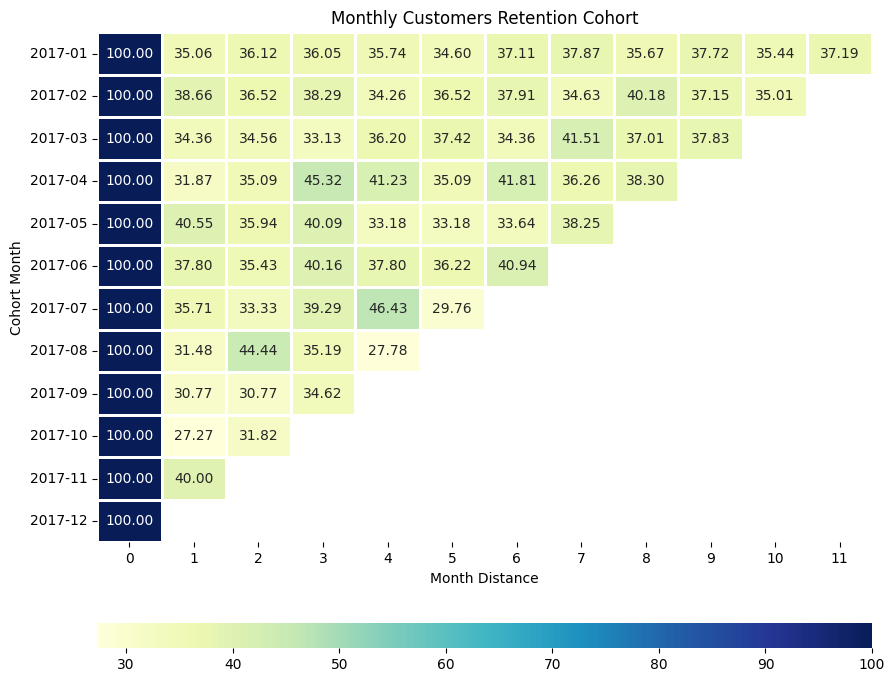

In [15]:
grid_kw = {
    'height_ratios':(20,1),
    'hspace': 0.3
}

fig, (ax_top, ax_bot) = plt.subplots(nrows=2,ncols=1,figsize=(10,8), gridspec_kw=grid_kw)
ax_top = sns.heatmap(
    data= df_cohort_percentage,
    cmap='YlGnBu',                                      #Palette warna
    ax= ax_top,                                         #subplot untuk heatmap
    cbar_ax=ax_bot,                                     #subplot untuk color bar
    cbar_kws= {'orientation':'horizontal'},             #mengubah orientasi color bar
    annot=True,                                         #menampilkan anotasi
    fmt='.2f',                                          #format anotasi 2 digit decimal
    linewidths= 2                                       #border antar cell
)

ax_top.set_title('Monthly Customers Retention Cohort')
ax_top.set_xlabel('Month Distance')
ax_top.set_ylabel('Cohort Month');


Insight: 
- Cohort yang paling retain (loyal) adalah cohort januari (2011-04)
- Pada bulan oktober, memilki rata2 retention paling tinggi di setiap batch 
- persentase customer plaing banyak terjadi pada cohort juli bulan ke-4 sebesar 46.43%
- persentase customer plaing sedikit terjadia pada cohort Oktober bulan ke-1 sebesar 27.27%
- secara horizontal (kiri ke kanan): untuk semua cohort, persentase customer dari bulan 1 ke bulan-bulan setelahnya cukup stabil 
- secara vertical (atas ke bawah): dari semua cohort rata2 yang paling tinggi berada di bulan ke 3

In [16]:
df_cohort['max_customer'] = df_cohort.groupby('cohort_month')['n_customers'].transform('max')

In [17]:
df_cohort

,cohort_month,current_order_month,n_customers,period_number,max_customer
0,2017-01,2017-01,1315,0,1315
1,2017-01,2017-02,461,1,1315
2,2017-01,2017-03,475,2,1315
3,2017-01,2017-04,474,3,1315
4,2017-01,2017-05,470,4,1315
...,...,...,...,...,...
73,2017-10,2017-11,6,1,22
74,2017-10,2017-12,7,2,22
75,2017-11,2017-11,15,0,15
76,2017-11,2017-12,6,1,15


In [18]:
df_cohort['n_customers_percent'] = (df_cohort['n_customers'] / df_cohort['max_customer'] * 100).round(2)

In [19]:
df_cohort

,cohort_month,current_order_month,n_customers,period_number,max_customer,n_customers_percent
0,2017-01,2017-01,1315,0,1315,100.00
1,2017-01,2017-02,461,1,1315,35.06
2,2017-01,2017-03,475,2,1315,36.12
3,2017-01,2017-04,474,3,1315,36.05
4,2017-01,2017-05,470,4,1315,35.74
...,...,...,...,...,...,...
73,2017-10,2017-11,6,1,22,27.27
74,2017-10,2017-12,7,2,22,31.82
75,2017-11,2017-11,15,0,15,100.00
76,2017-11,2017-12,6,1,15,40.00


In [20]:
top3 = df_cohort[df_cohort['period_number']==1].sort_values('n_customers_percent', ascending=False).head(3)
top3

,cohort_month,current_order_month,n_customers,period_number,max_customer,n_customers_percent
43,2017-05,2017-06,88,1,217,40.55
76,2017-11,2017-12,6,1,15,40.00
13,2017-02,2017-03,307,1,794,38.66


In [21]:
top3['cohort_month'] = top3['cohort_month'].astype(str)
top3['current_order_month'] = top3['current_order_month'].astype(str)

In [22]:
df_cohort

,cohort_month,current_order_month,n_customers,period_number,max_customer,n_customers_percent
0,2017-01,2017-01,1315,0,1315,100.00
1,2017-01,2017-02,461,1,1315,35.06
2,2017-01,2017-03,475,2,1315,36.12
3,2017-01,2017-04,474,3,1315,36.05
4,2017-01,2017-05,470,4,1315,35.74
...,...,...,...,...,...,...
73,2017-10,2017-11,6,1,22,27.27
74,2017-10,2017-12,7,2,22,31.82
75,2017-11,2017-11,15,0,15,100.00
76,2017-11,2017-12,6,1,15,40.00


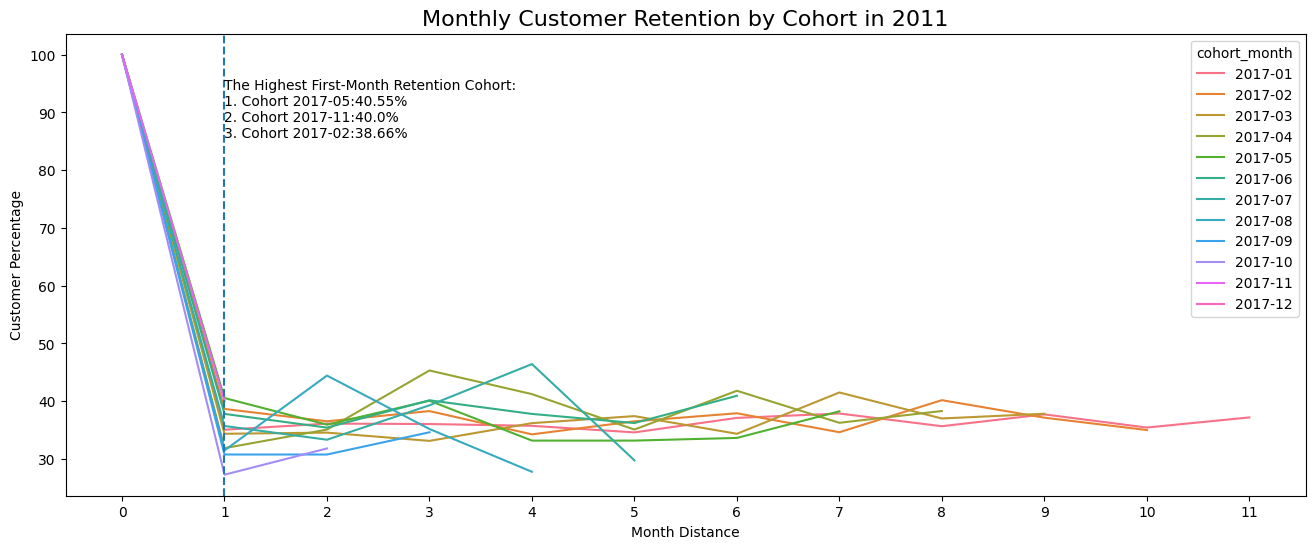

In [23]:
plt.figure(figsize=(16,6))

sns.lineplot(
    data=df_cohort,
    x='period_number',
    y='n_customers_percent',
    hue= 'cohort_month'
)

#menambahkan text didalam figure
text_lineplot= f'''
The Highest First-Month Retention Cohort:
1. Cohort {top3['cohort_month'].iloc[0]}:{top3['n_customers_percent'].iloc[0]}%
2. Cohort {top3['cohort_month'].iloc[1]}:{top3['n_customers_percent'].iloc[1]}%
3. Cohort {top3['cohort_month'].iloc[2]}:{top3['n_customers_percent'].iloc[2]}%

'''
plt.text(x=1, y=80, s=text_lineplot)

#menambahkan garis vertical
plt.axvline(x=1, linestyle='--')

plt.xticks(ticks=range(0,12,1))
plt.title('Monthly Customer Retention by Cohort in 2011', size=16)
plt.xlabel('Month Distance')
plt.ylabel('Customer Percentage')
plt.show()

3. Bandingkan total omzet/hasil penjualan (list_price) dari tiap brand! Brand apa yang
menghasilkan omzet paling tinggi? Buatlah visualisasinya!

In [39]:
df_approved = df[df['order_status']=='Approved']

In [43]:
df_brand_omzet = df_approved.groupby('brand')[['list_price']].sum().reset_index().sort_values(by='list_price', ascending=False)

In [44]:
px.bar(
    data_frame=df_brand_omzet,
    x='brand',
    y='list_price'
)

4. Perusahaan ingin melihat omzet yang dihasilkan berdasarkan product class-nya untuk tiap
brand. Tampilkan visualisasi total omzet (list_price) per product class per brand secara
hierarchial (Treemaps)!

In [26]:
df_tree = df.groupby(['product_class','brand']).agg({'list_price':sum}).reset_index()
df_tree

,product_class,brand,list_price
0,high,Giant Bicycles,1048204.66
1,high,Norco Bicycles,659152.50
2,high,OHM Cycles,675288.39
3,high,Solex,661280.66
4,high,Trek Bicycles,135987.76
5,low,Giant Bicycles,112149.40
6,low,Norco Bicycles,407820.06
7,low,OHM Cycles,631311.24
8,low,Solex,436557.06
9,low,Trek Bicycles,801403.88


In [27]:
fig = px.treemap(
    data_frame=df_tree,
    path=['brand','product_class'],
    values='list_price',
    color='list_price',
    color_continuous_scale='YlGnBu',
    width=1000,
    height=700,
    title='Omzet by product class and brand'
)

fig.show()

5. Perusahaan ingin melihat perubahan jumlah customer tiap bulannya dari bulan Januari sampai
Desember khusus dari customer yang melakukan transaksi pertama di bulan Januari 2017.
Tampilkan visualisasinya dengan Waterfall Plot!


In [28]:
df_januari = df_cohort[df_cohort['cohort_month']=='2017-01']

In [29]:
list_kosong=[]
for  i in range(11):
    list_kosong.append(df_januari['n_customers'][i+1] - df_januari['n_customers'][i])

list_kosong

[-854, 14, -1, -4, -15, 33, 10, -29, 27, -30, 23]

In [30]:
df_januari['change'] = 1315

C:\Users\user\AppData\Local\Temp\ipykernel_2076\299505088.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
df_januari['change'][1:] = list_kosong

C:\Users\user\AppData\Local\Temp\ipykernel_2076\635729706.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df_januari

,cohort_month,current_order_month,n_customers,period_number,max_customer,n_customers_percent,change
0,2017-01,2017-01,1315,0,1315,100.00,1315
1,2017-01,2017-02,461,1,1315,35.06,-854
2,2017-01,2017-03,475,2,1315,36.12,14
3,2017-01,2017-04,474,3,1315,36.05,-1
4,2017-01,2017-05,470,4,1315,35.74,-4
5,2017-01,2017-06,455,5,1315,34.60,-15
6,2017-01,2017-07,488,6,1315,37.11,33
7,2017-01,2017-08,498,7,1315,37.87,10
8,2017-01,2017-09,469,8,1315,35.67,-29
9,2017-01,2017-10,496,9,1315,37.72,27


In [33]:
df_januari

,cohort_month,current_order_month,n_customers,period_number,max_customer,n_customers_percent,change
0,2017-01,2017-01,1315,0,1315,100.00,1315
1,2017-01,2017-02,461,1,1315,35.06,-854
2,2017-01,2017-03,475,2,1315,36.12,14
3,2017-01,2017-04,474,3,1315,36.05,-1
4,2017-01,2017-05,470,4,1315,35.74,-4
5,2017-01,2017-06,455,5,1315,34.60,-15
6,2017-01,2017-07,488,6,1315,37.11,33
7,2017-01,2017-08,498,7,1315,37.87,10
8,2017-01,2017-09,469,8,1315,35.67,-29
9,2017-01,2017-10,496,9,1315,37.72,27


In [34]:
measures = ['relative']*12
measures

['relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative']

In [35]:
list(df_januari['current_order_month'].astype(str))

['2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12']

In [36]:
label = [str(x) if x<=0 else '+'+str(x) for x in df_januari['change']] + [str(489)]
label

['+1315',
 '-854',
 '+14',
 '-1',
 '-4',
 '-15',
 '+33',
 '+10',
 '-29',
 '+27',
 '-30',
 '+23',
 '489']

In [37]:
# atur layout untuk figure
my_layout = go.Layout(
    title='Number of Employees 2006-2020',
    title_x=0.5,
    width=800,
    height=1000,
    xaxis= dict(dtick=1)            # step untuk x ticks
)

# buat figure
fig = go.Figure(layout= my_layout)

# buat watefall plot
waterfall = go.Waterfall(
    x= list(df_januari['current_order_month'].astype(str)),                    # tambah tahun terbaru (2021)       
    y= list(df_januari['change']),     # total karyawan 2021: 194
    measure= measures,                              # measure 2021: 'total'
    orientation= 'v',
    text= label,
    textposition= 'outside'
)

# masukkan waterfall plot ke dalam fig
fig.add_trace(waterfall)

# atur yaxes
fig.update_xaxes(tickangle= -90,type='category')
# fig.update_xaxes

fig.show()